In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download snmahsa/student-score-suitable-for-linear-regression

Dataset URL: https://www.kaggle.com/datasets/snmahsa/student-score-suitable-for-linear-regression
License(s): other
  0% 0.00/403 [00:00<?, ?B/s]
100% 403/403 [00:00<00:00, 1.07MB/s]


In [13]:
import numpy as np
import pandas as pd

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('student-score-suitable-for-linear-regression.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
df = pd.read_csv('/content/rounded_hours_student_scores.csv')
df

,Hours,Scores
0,1.1,41
1,1.2,40
2,1.4,38
3,1.5,39
4,1.6,36
5,1.8,40
6,1.9,42
7,2.1,41
8,2.2,45
9,2.3,43


from matplotlib import pyplot as plt
df['Hours'].plot(kind='hist', bins=20, title='Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Scores'].plot(kind='hist', bins=20, title='Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Hours', y='Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Hours']
  ys = series['Scores']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Hours', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hours')
_ = plt.ylabel('Scores')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Hours']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Hours'}, axis=1)
              .sort_values('Hours', ascending=True))
  xs = counted['Hours']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Hours', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hours')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Hours'].plot(kind='line', figsize=(8, 4), title='Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Scores'].plot(kind='line', figsize=(8, 4), title='Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   60 non-null     float64
 1   Scores  60 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [16]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Scores')

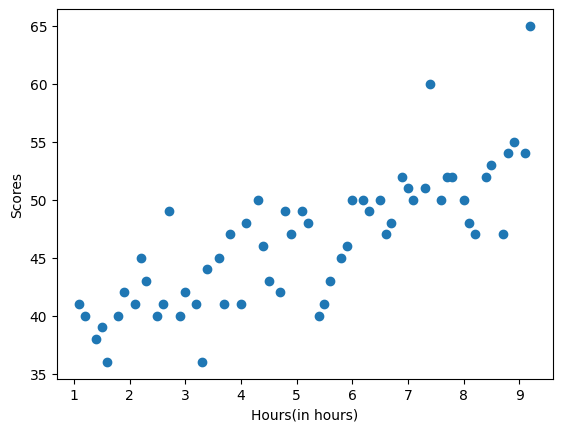

In [17]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel(('Hours(in hours)'))
plt.ylabel(('Scores'))

In [18]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [27]:
x_train

,Hours
35,5.9
28,4.9
49,7.8
32,5.5
1,1.2
30,5.2
44,7.1
27,4.8
9,2.3
10,2.5


In [19]:
x

,Hours
0,1.1
1,1.2
2,1.4
3,1.5
4,1.6
5,1.8
6,1.9
7,2.1
8,2.2
9,2.3


In [20]:
y

,Scores
0,41
1,40
2,38
3,39
4,36
5,40
6,42
7,41
8,45
9,43


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [28]:
y_train

,Scores
35,46
28,47
49,52
32,41
1,40
30,48
44,50
27,49
9,43
10,40


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
x_test

,Hours
36,6.0
0,1.1
47,7.6
55,8.7
23,4.3
46,7.4


In [26]:
y_test

,Scores
36,50
0,41
47,50
55,47
23,50
46,60


In [29]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.87643112])

In [33]:
lr.predict(x_test.iloc[1].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.3573957])

In [34]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.98468759])

In [35]:
lr.predict(x_test.iloc[3].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.1216139])

In [36]:
lr.predict(x_test.iloc[4].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.57390863])

In [37]:
lr.predict(x_test.iloc[5].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.59615553])

Text(0, 0.5, 'Scores')

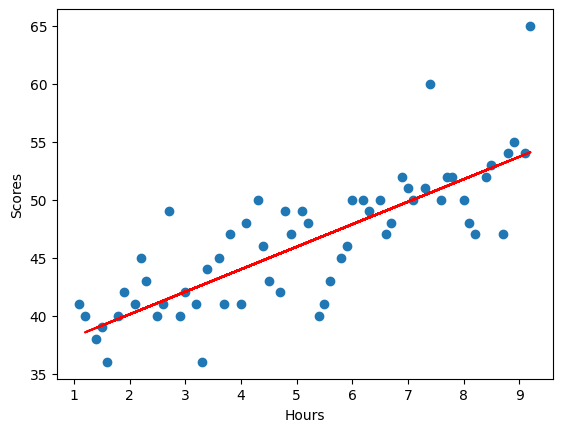

In [39]:
plt.scatter(df['Hours'],df['Scores'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [45]:
m =lr.coef_
m

array([1.94266029])

In [46]:
b = lr.intercept_
b

np.float64(36.22046937982117)

In [48]:
y = m*(6) + b
y

array([47.87643112])

In [50]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.87643112])

In [53]:
y_predict = lr.predict(x_test)
y_predict

array([47.87643112, 38.3573957 , 50.98468759, 53.1216139 , 44.57390863,
       50.59615553])

In [55]:
y_test.values

array([50, 41, 50, 47, 50, 60])

In [56]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 27.968571193093734
